In [33]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Reduce_the_data_hourly_counts').getOrCreate()

df = spark.read.csv('../Bike-Sharing-Dataset-hour_new.csv',header=True,inferSchema=True)

In [34]:
import pandas as pd
from pyspark.sql.functions import *

group_df = df.select('hr','casual','registered','cnt')
group_df = group_df.groupBy('hr').mean()
group_df = group_df.select('hr',
                            format_number('avg(casual)',2),
                            format_number('avg(registered)',2),
                            format_number('avg(cnt)',2))
group_df = group_df.select(col('hr').alias('Hour'),
                           col('format_number(avg(casual), 2)').alias('Average Casual'),
                           col('format_number(avg(registered), 2)').alias('Average Registered'),
                           col('format_number(avg(cnt), 2)').alias('Average CNT')).orderBy('avg(cnt)')
pd.DataFrame(group_df.take(group_df.count()), columns=group_df.columns)

,Hour,Average Casual,Average Registered,Average CNT
0,4,2.82,11.98,14.80
1,3,4.22,15.71,19.93
2,5,2.05,21.05,23.11
3,2,5.43,21.05,26.48
4,1,6.78,28.08,34.86
5,0,10.33,44.49,54.82
6,6,4.41,72.55,76.96
7,23,15.28,72.96,88.24
8,22,22.31,109.26,131.57
9,21,28.28,144.10,172.38


In [35]:
pd.DataFrame(group_df.take(group_df.count()), columns=group_df.columns).transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Hour,4,3,5,2,1,0,6,23,22,21,...,20,14,15,12,13,19,16,8,18,17
Average Casual,2.82,4.22,2.05,5.43,6.78,10.33,4.41,15.28,22.31,28.28,...,36.23,75.46,74.80,68.16,72.21,48.71,73.69,21.75,61.01,74.22
Average Registered,11.98,15.71,21.05,21.05,28.08,44.49,72.55,72.96,109.26,144.10,...,189.65,165.35,176.26,184.89,181.27,262.30,238.12,336.32,363.52,386.86
Average CNT,14.80,19.93,23.11,26.48,34.86,54.82,76.96,88.24,131.57,172.38,...,225.87,240.80,251.06,253.05,253.48,311.02,311.81,358.08,424.54,461.08


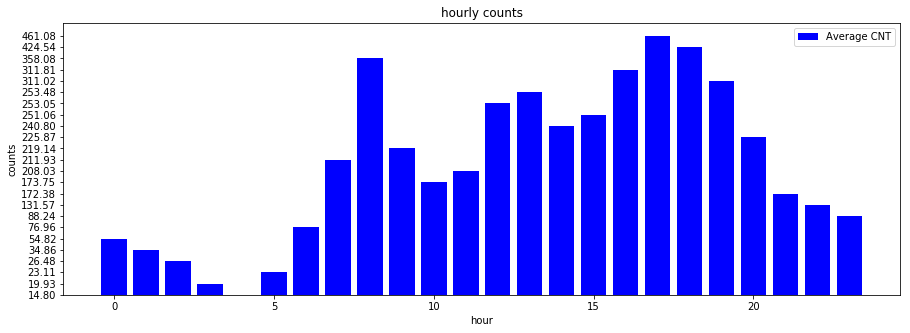

In [36]:
import matplotlib.pyplot as plt

group_df = group_df.toPandas()
plt.bar(group_df['Hour'], group_df['Average CNT'], color = 'b')
plt.legend(['Average CNT'])
plt.xlabel('hour')
plt.ylabel('counts')
plt.title('hourly counts')
plt.show()

In [37]:
plt.rcParams['figure.figsize'] = (15,5)